In [1]:
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('data_clean.csv')

In [3]:
data

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,http://world-fr.openfoodfacts.org/produit/3396...,Chocolat Noir Costa Rica 75% De Cacao,Bonneterre,Sugary snacks,556.0,44.0,27.000000,30.000000,24.000000,10.000000,0.030000,0.011811
1,http://world-fr.openfoodfacts.org/produit/3263...,Dégustation Lait,Franprix,Sugary snacks,572.4,38.0,22.000000,50.000000,49.000000,7.600000,0.190000,0.074803
2,http://world-fr.openfoodfacts.org/produit/8410...,Biscuits Petit-Déjeuner Céréales Complètes San...,Gullon,Sugary snacks,413.2,14.0,1.300000,65.000000,1.400000,6.800000,0.650000,0.255906
3,http://world-fr.openfoodfacts.org/produit/2404...,Galletas Tostadas,Aurada,Sugary snacks,425.6,10.0,5.000000,77.000000,21.000000,6.900000,0.780000,0.307087
4,http://world-fr.openfoodfacts.org/produit/8430...,Galletas Tostadas,SuperSol,Sugary snacks,425.6,10.0,5.000000,77.000000,21.000000,6.900000,0.780000,0.307087
...,...,...,...,...,...,...,...,...,...,...,...,...
231010,http://world-fr.openfoodfacts.org/produit/4005...,Pâté Shiitake,Tartex,Fruits and vegetables,214.7,17.9,4.749687,6.400000,16.592037,7.000000,1.267303,0.498955
231011,http://world-fr.openfoodfacts.org/produit/7520...,Coriandre Gourmet Garden,Gourmet Garden,Sugary snacks,10.0,0.3,4.749687,33.922107,16.592037,7.099545,0.127000,0.050000
231012,http://world-fr.openfoodfacts.org/produit/5601...,Spaghetti classica,Nacional,Cereals and potatoes,348.2,1.8,0.400000,71.000000,5.000000,12.000000,0.010160,0.004000
231013,http://world-fr.openfoodfacts.org/produit/5601...,Soupe de queue de boeuf (potage oxtail),Maggi,Composite foods,366.3,11.9,0.500000,51.800000,7.200000,13.000000,14.732000,5.800000


# Analyse univariée

## Variable qualitative 

In [65]:
data['pnns_groups_1'].value_counts()

Sugary snacks              49214
Cereals and potatoes       36342
Milk and dairy products    27531
Composite foods            24634
Beverages                  22734
Fat and sauces             18473
Fish Meat Eggs             16998
Fruits and vegetables      16141
Salty snacks               15210
fruits-and-vegetables       2565
sugary-snacks               1144
cereals-and-potatoes          28
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

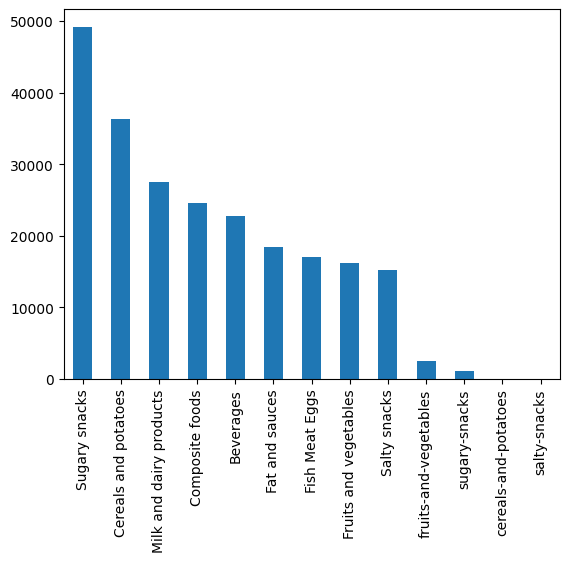

In [5]:
data['pnns_groups_1'].value_counts().plot.bar()
plt.show()

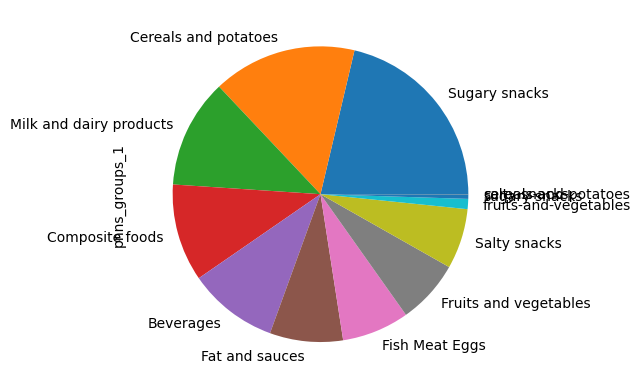

In [6]:
data['pnns_groups_1'].value_counts().plot.pie()
plt.show()

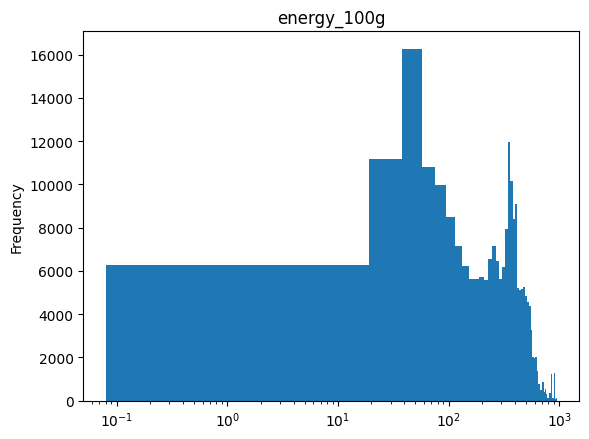

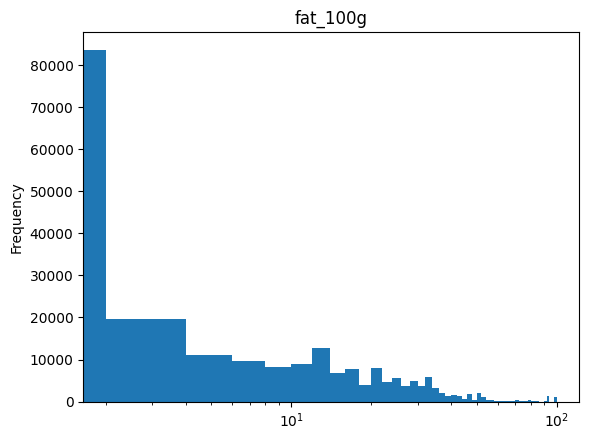

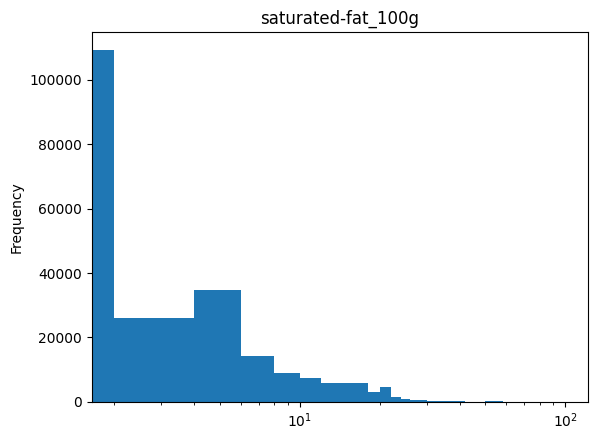

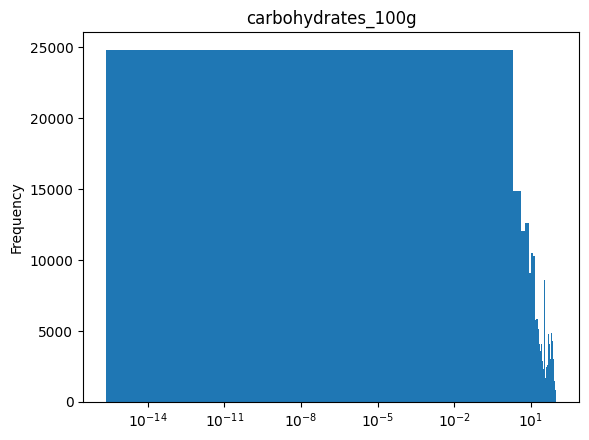

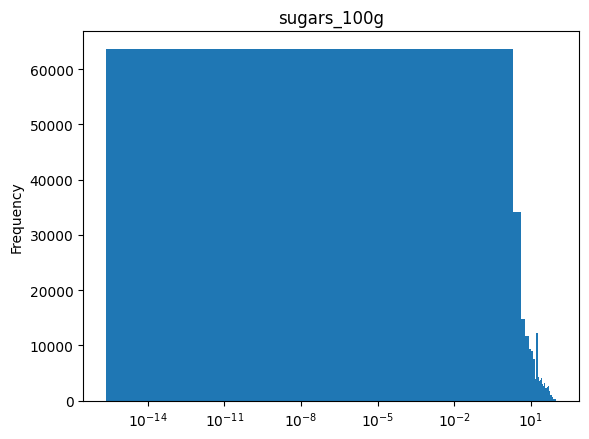

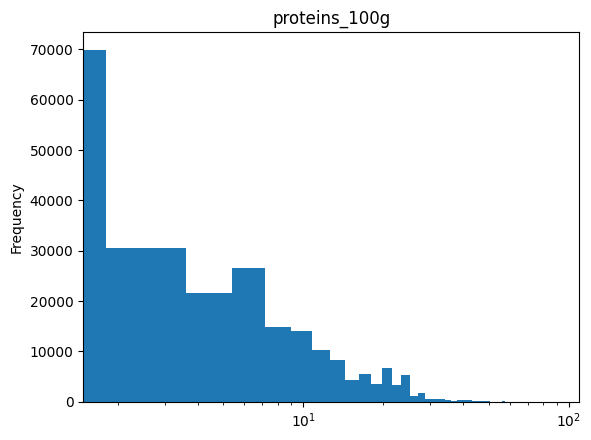

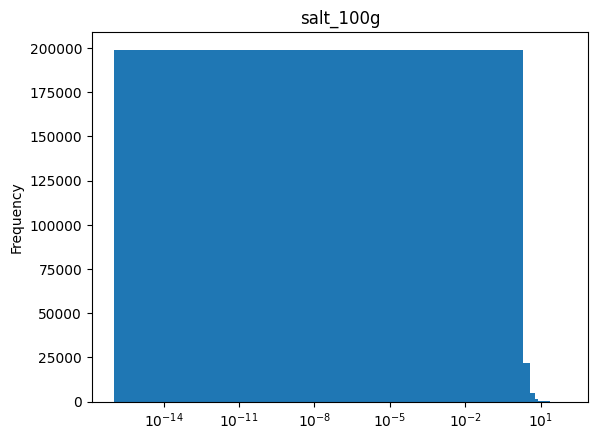

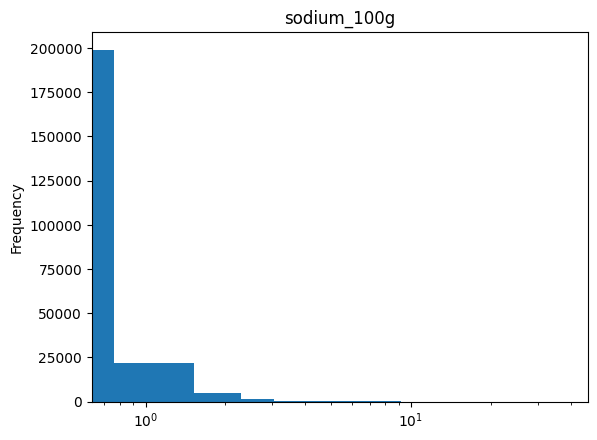

In [7]:
for col in ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g','sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']:
   # Tracer un histogramme avec une échelle logarithmique
   data[col].plot.hist(bins=50, logx=True)
   plt.title(col)
   plt.show()


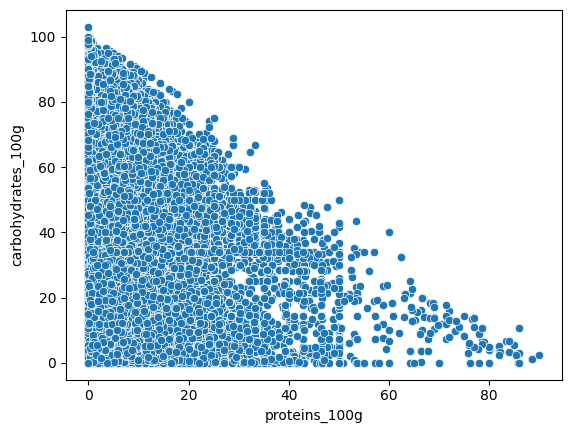

In [8]:
sns.scatterplot(x='proteins_100g', y='carbohydrates_100g', data=data)
plt.show()

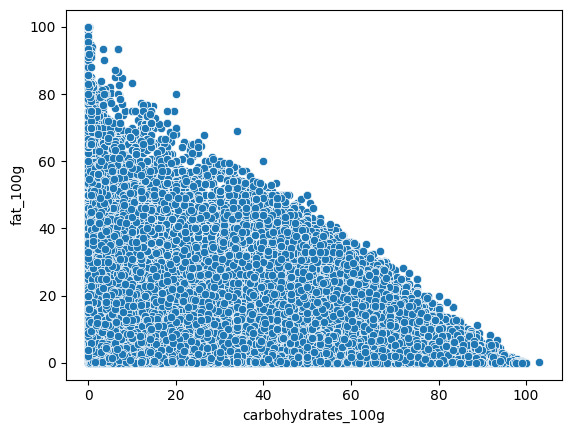

In [9]:
sns.scatterplot(x='carbohydrates_100g', y='fat_100g', data=data)
plt.show()

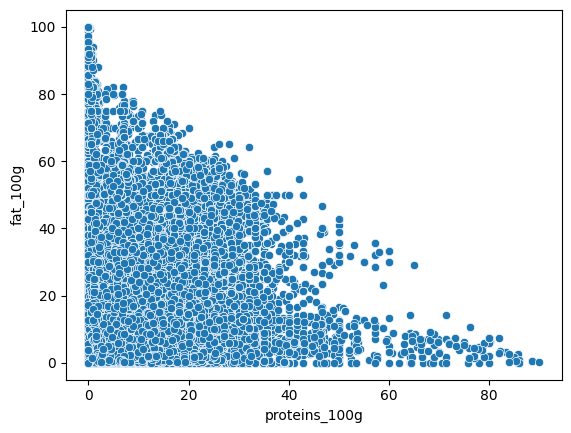

In [10]:
sns.scatterplot(x='proteins_100g', y='fat_100g', data=data)
plt.show()

In [11]:
data.columns

Index(['url', 'product_name', 'brands', 'pnns_groups_1', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

In [12]:
df=data.drop(labels = ['url','product_name','brands','pnns_groups_1'], axis = 1)

In [13]:
df.corr()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
energy_100g,1.000000,0.758489,0.519993,0.462020,0.280782,0.270103,-0.004919,-0.004917
fat_100g,0.758489,1.000000,0.675833,-0.123699,-0.056982,0.217688,-0.007367,-0.007366
saturated-fat_100g,0.519993,0.675833,1.000000,-0.064056,0.092044,0.155547,-0.006173,-0.006176
carbohydrates_100g,0.462020,-0.123699,-0.064056,1.000000,0.655703,-0.127347,-0.033531,-0.033530
sugars_100g,0.280782,-0.056982,0.092044,0.655703,1.000000,-0.281075,-0.096858,-0.096857
proteins_100g,0.270103,0.217688,0.155547,-0.127347,-0.281075,1.000000,0.102024,0.102033
salt_100g,-0.004919,-0.007367,-0.006173,-0.033531,-0.096858,0.102024,1.000000,0.999998
sodium_100g,-0.004917,-0.007366,-0.006176,-0.033530,-0.096857,0.102033,0.999998,1.000000


<AxesSubplot: >

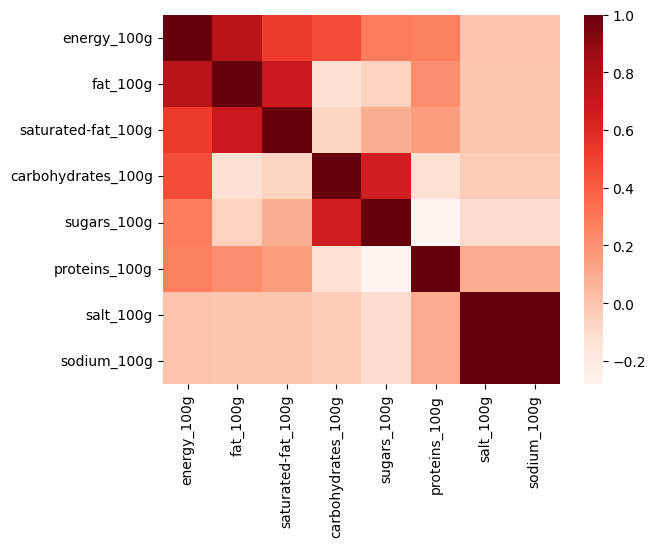

In [14]:
sns.heatmap(df.corr(), cmap="Reds")

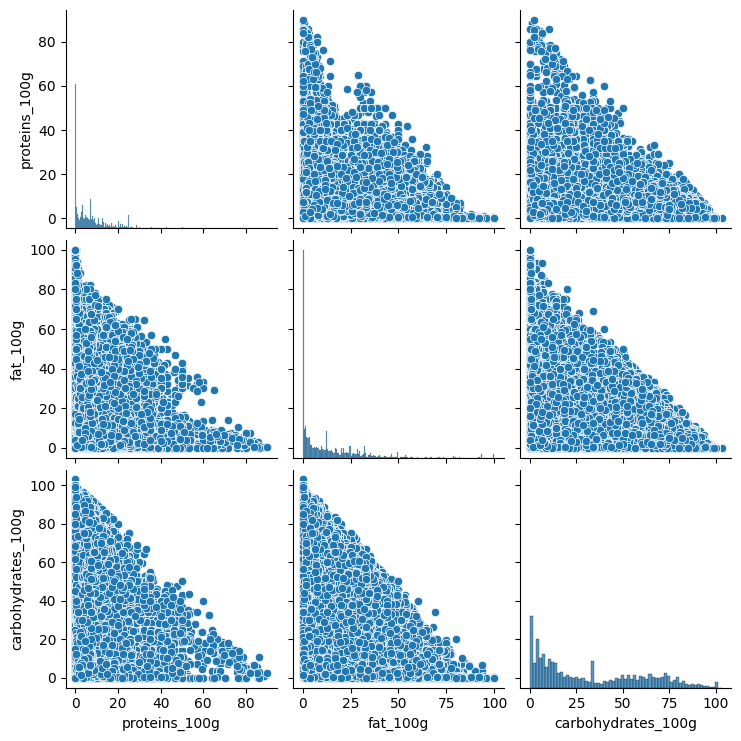

In [15]:
df = data[['proteins_100g', 'fat_100g', 'carbohydrates_100g']]

# Tracer un pairplot des colonnes sélectionnées
sns.pairplot(df)
plt.show()

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes quantitatives
X = data.iloc[:, 4:]

# Normalisation des données
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = scaler.fit_transform(X)

In [17]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
n_components = 6

pca = PCA(n_components=n_components)

pca.fit(X_scaled)

PCA(n_components=6)

In [19]:
pca.explained_variance_ratio_

array([0.30585851, 0.26465292, 0.22066601, 0.11148539, 0.05835917,
       0.03402725])

In [20]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([30.59, 26.47, 22.07, 11.15,  5.84,  3.4 ])

In [21]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 31.,  57.,  79.,  90.,  96., 100.])

In [22]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

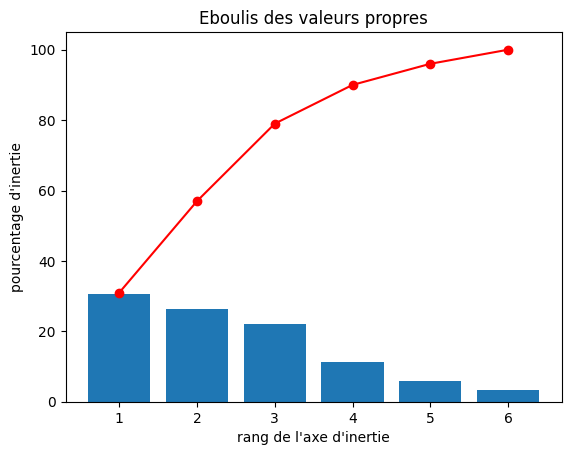

In [23]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [24]:
pcs = pca.components_
pcs

array([[ 0.59378663,  0.54804913,  0.49323928,  0.18516463,  0.17583188,
         0.19155289, -0.03065435, -0.03065305],
       [-0.02232355,  0.13216527,  0.08793283, -0.29871798, -0.34854798,
         0.26200022,  0.58946525,  0.58946611],
       [ 0.11742024, -0.21917049, -0.15234112,  0.55941486,  0.50830914,
        -0.22996658,  0.38128832,  0.38128779],
       [ 0.16526428, -0.21703661, -0.36872943,  0.30674764, -0.09231382,
         0.82163564, -0.07720707, -0.07719729],
       [-0.38529241, -0.3306361 ,  0.58145066, -0.17842951,  0.48342987,
         0.37228928,  0.00138005,  0.00138082],
       [-0.02094736, -0.36689263,  0.50062777,  0.50198242, -0.58850377,
        -0.12451863, -0.01572619, -0.01573533]])

In [25]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.593787,0.548049,0.493239,0.185165,0.175832,0.191553,-0.030654,-0.030653
1,-0.022324,0.132165,0.087933,-0.298718,-0.348548,0.262000,0.589465,0.589466
2,0.117420,-0.219170,-0.152341,0.559415,0.508309,-0.229967,0.381288,0.381288
3,0.165264,-0.217037,-0.368729,0.306748,-0.092314,0.821636,-0.077207,-0.077197
4,-0.385292,-0.330636,0.581451,-0.178430,0.483430,0.372289,0.001380,0.001381
5,-0.020947,-0.366893,0.500628,0.501982,-0.588504,-0.124519,-0.015726,-0.015735


In [26]:
pcs.columns

RangeIndex(start=0, stop=8, step=1)

In [27]:
features = X.columns

In [28]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
F1,0.59,0.55,0.49,0.19,0.18,0.19,-0.03,-0.03
F2,-0.02,0.13,0.09,-0.30,-0.35,0.26,0.59,0.59
F3,0.12,-0.22,-0.15,0.56,0.51,-0.23,0.38,0.38
F4,0.17,-0.22,-0.37,0.31,-0.09,0.82,-0.08,-0.08
F5,-0.39,-0.33,0.58,-0.18,0.48,0.37,0.00,0.00
F6,-0.02,-0.37,0.50,0.50,-0.59,-0.12,-0.02,-0.02


In [29]:
pcs.T

,F1,F2,F3,F4,F5,F6
energy_100g,0.593787,-0.022324,0.117420,0.165264,-0.385292,-0.020947
fat_100g,0.548049,0.132165,-0.219170,-0.217037,-0.330636,-0.366893
saturated-fat_100g,0.493239,0.087933,-0.152341,-0.368729,0.581451,0.500628
carbohydrates_100g,0.185165,-0.298718,0.559415,0.306748,-0.178430,0.501982
sugars_100g,0.175832,-0.348548,0.508309,-0.092314,0.483430,-0.588504
proteins_100g,0.191553,0.262000,-0.229967,0.821636,0.372289,-0.124519
salt_100g,-0.030654,0.589465,0.381288,-0.077207,0.001380,-0.015726
sodium_100g,-0.030653,0.589466,0.381288,-0.077197,0.001381,-0.015735


<AxesSubplot: >

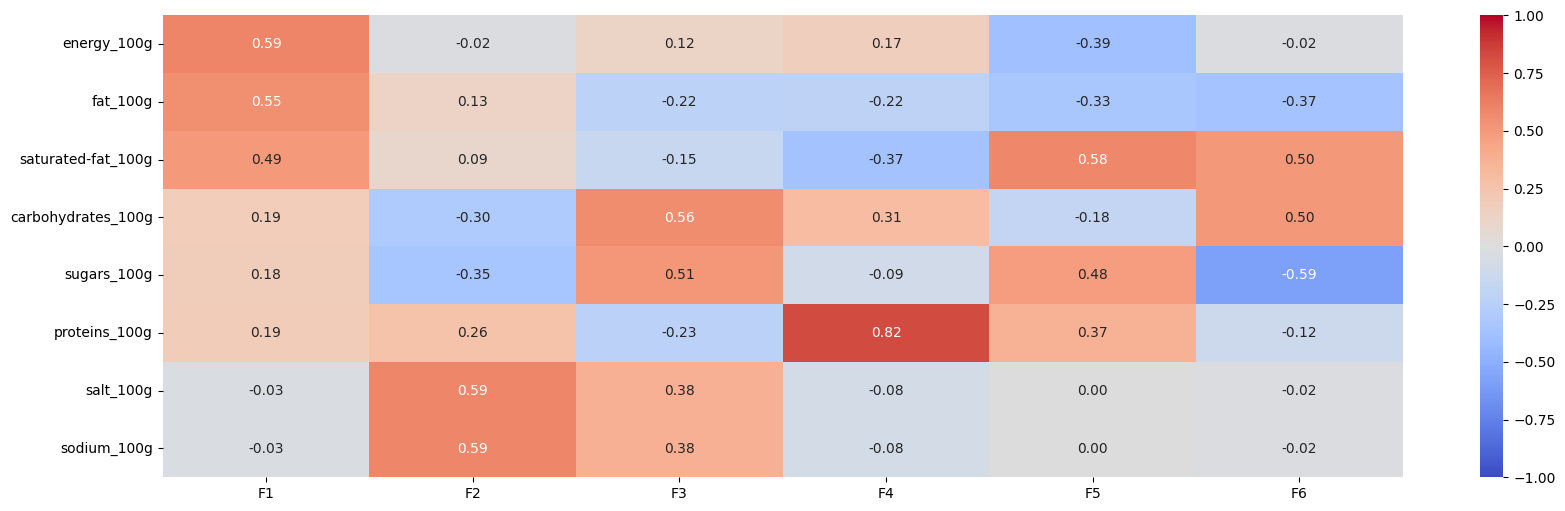

In [30]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [31]:
x, y = 0,1

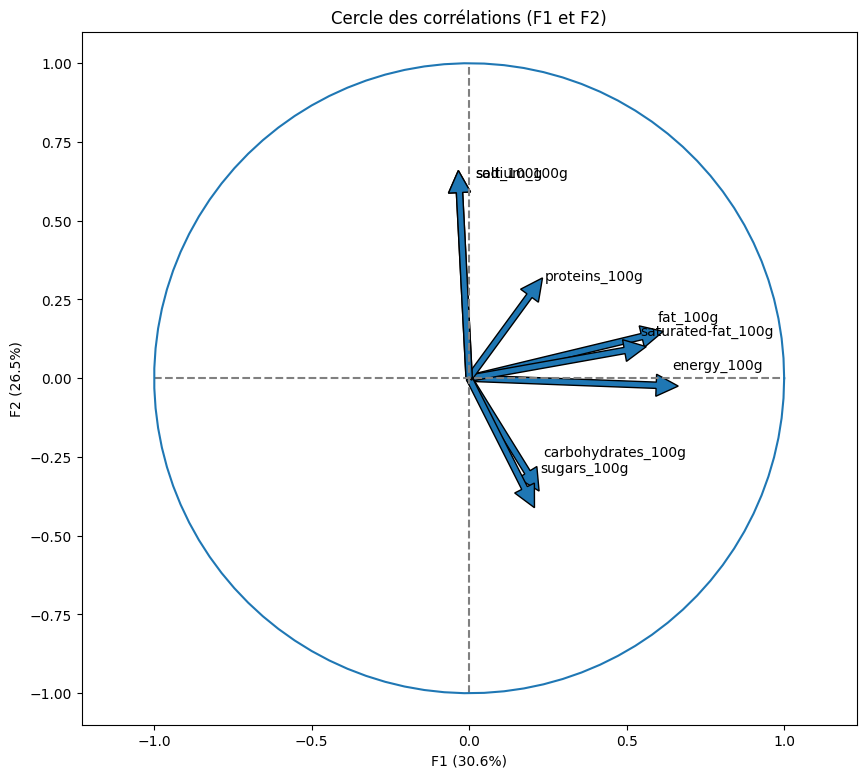

In [32]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [52]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Ajoute un cercle unitaire pour échelle

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [54]:
x_y = (0,1)

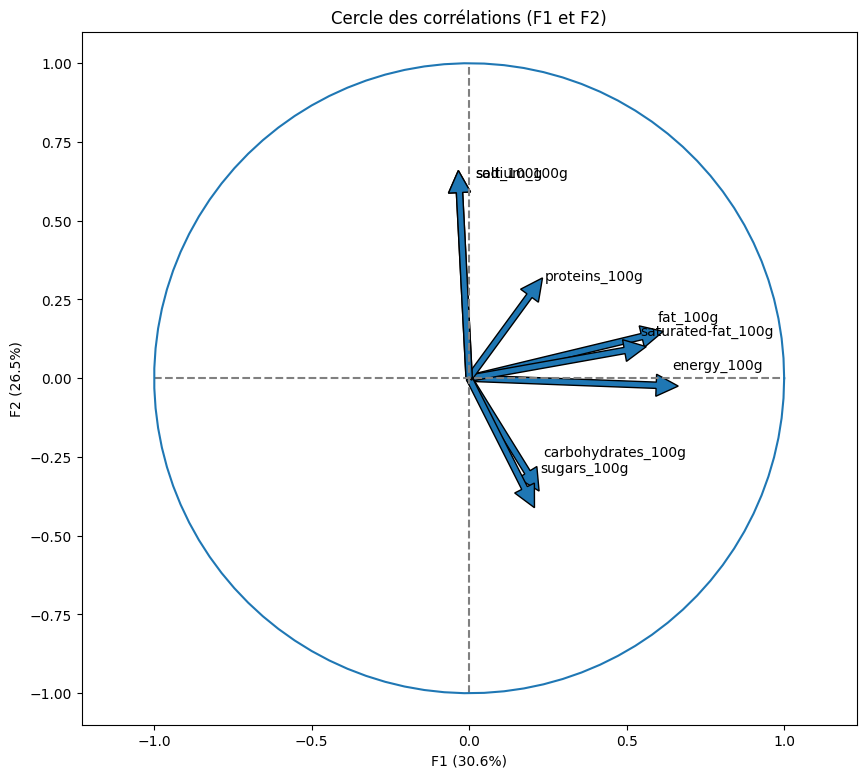

In [55]:
correlation_graph(pca, x_y, features)

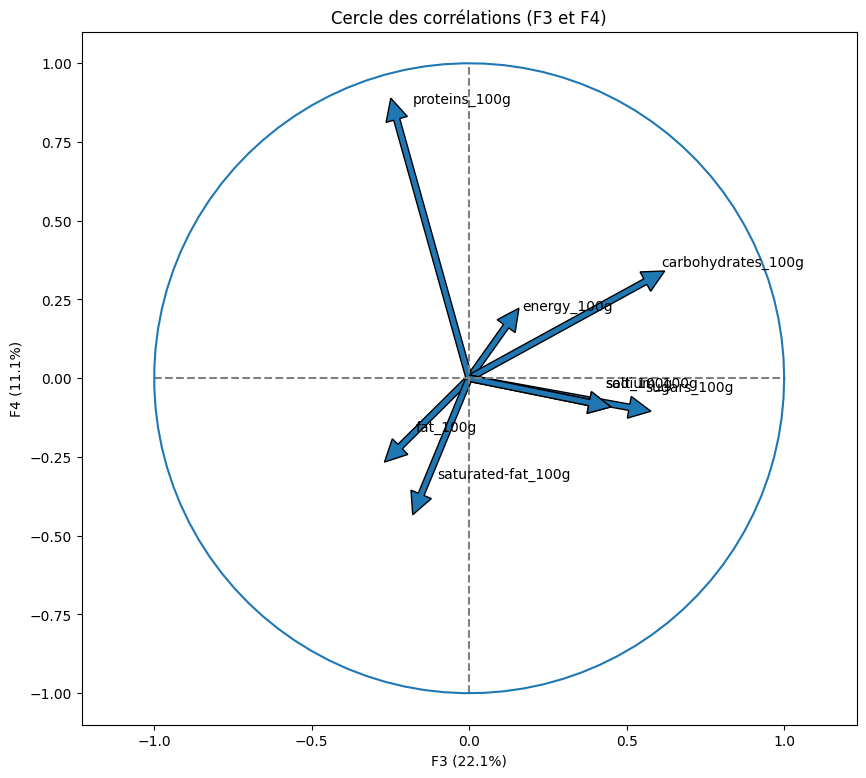

In [56]:
correlation_graph(pca, (2,3), features)

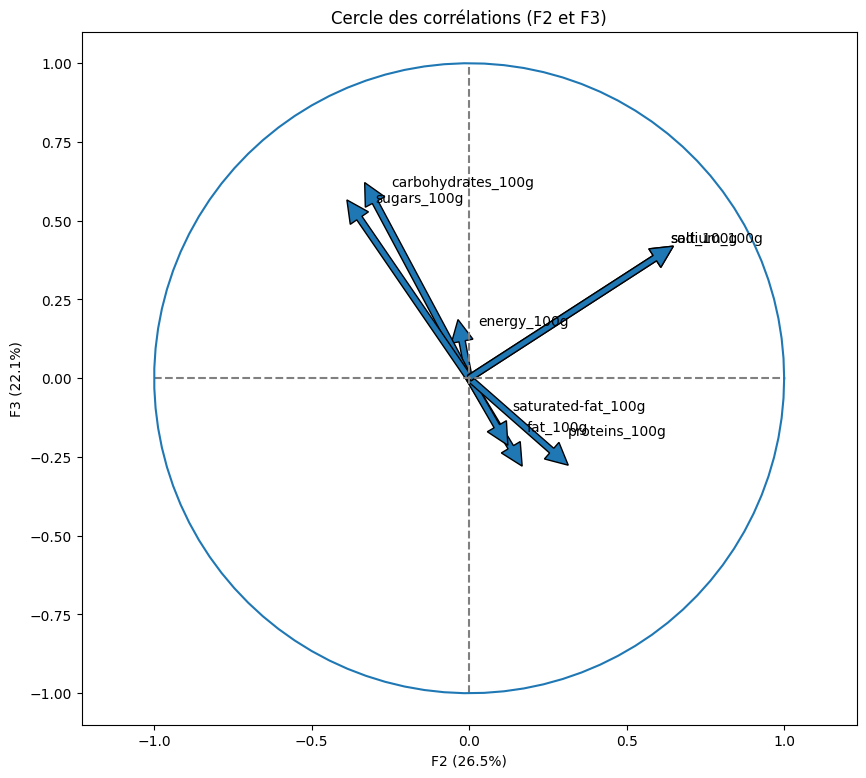

In [60]:
correlation_graph(pca, (1,2), features)

In [ ]:
def correlation_graph(pca, x_y, features):
    """Affiche le graphe des correlations

    Positional arguments:
    -----------------------------------
    pca: sklearn.decomposition.PCA: notre objet PCA qui a été fit
    x_y: list ou tuple: le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features: list ou tuple: la liste des features (ie des dimensions) à représenter
    """
    # Extrait x et y
    x, y = x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Créer une liste de marqueurs de points de données
    markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd']

    # Créer une liste d'éléments de légende
    legend_elements = []
    for i in range(pca.components_.shape[1]):
        # Tracer le point de données sur le graphique
        plt.scatter(pca.components_[x, i], pca.components_[y, i], marker=markers[i])
        # Ajouter l'élément de légende
        legend_elements.append(plt.scatter([], [], marker=markers[i], label=features[i]))

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x + 1, round(100 * pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('F{} ({}%)'.format(y + 1, round(100 * pca.explained_variance_ratio_[y], 1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x + 1, y + 1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Ajoute un cercle unitaire pour échelle

    # Ajouter la légende
    plt.legend(handles=legend_elements)

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [40]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 3.52395881,  0.00578871, -0.91528155, -1.01345502,  0.98617282,
         0.53335104],
       [ 3.32490963, -0.76194914,  0.41318555, -0.81842165,  1.0213302 ,
        -0.02379989],
       [ 0.29313119, -0.36689917,  0.30825326,  0.68952235, -1.14483605,
         0.7197773 ],
       [ 0.70679415, -0.76355248,  1.04908059,  0.60523542, -0.39490136,
         0.70415934],
       [ 0.70679415, -0.76355248,  1.04908059,  0.60523542, -0.39490136,
         0.70415934]])

In [41]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

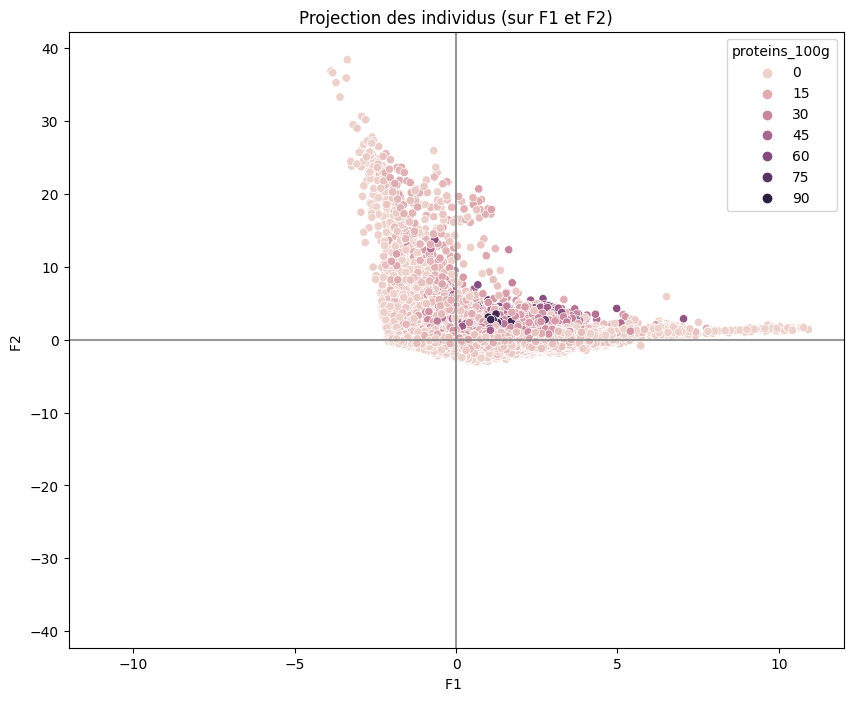

In [42]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=df['proteins_100g'])

In [43]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 20)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

/home/lolonois/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lolonois/.local/li

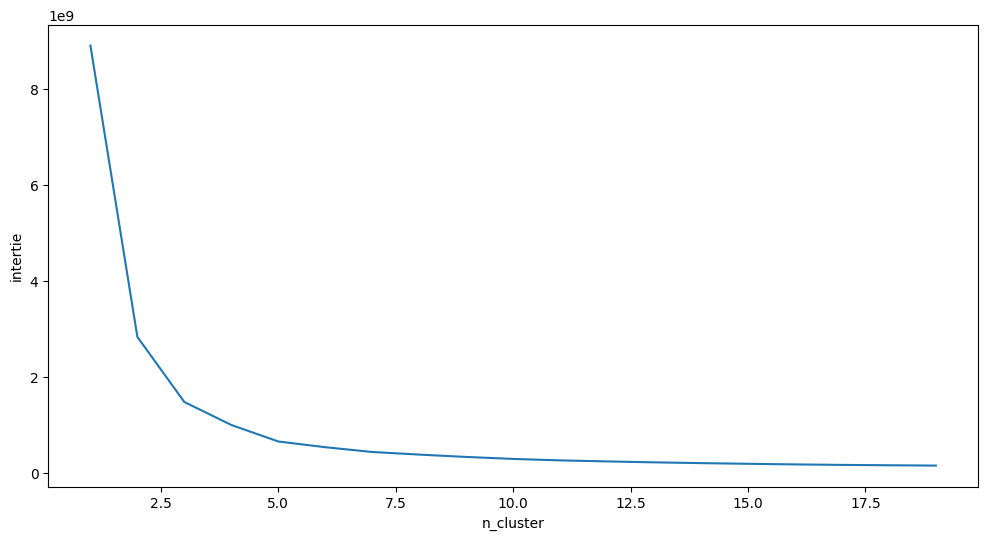

In [44]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [45]:
x_proj = pd.DataFrame(X_proj[:,:4], columns = ['F1', 'F2','F3','F4'])

In [46]:
x_proj

,F1,F2,F3,F4
0,3.523959,0.005789,-0.915282,-1.013455
1,3.324910,-0.761949,0.413186,-0.818422
2,0.293131,-0.366899,0.308253,0.689522
3,0.706794,-0.763552,1.049081,0.605235
4,0.706794,-0.763552,1.049081,0.605235
...,...,...,...,...
231010,-0.218157,0.339617,-0.565398,-0.426723
231011,-1.208546,-0.513468,-0.213874,-0.010060
231012,-0.151896,-0.672674,0.339025,1.454887
231013,-0.151578,5.442504,3.640708,0.456636


In [47]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x_proj)

/home/lolonois/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [48]:
dd = {i:j for i,j in enumerate(list("abcde"))}
dd

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}

In [49]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['e', 'e', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'e']

In [50]:
x_proj["cluster"] = labels
x_proj

,F1,F2,F3,F4,cluster
0,3.523959,0.005789,-0.915282,-1.013455,e
1,3.324910,-0.761949,0.413186,-0.818422,e
2,0.293131,-0.366899,0.308253,0.689522,b
3,0.706794,-0.763552,1.049081,0.605235,a
4,0.706794,-0.763552,1.049081,0.605235,a
...,...,...,...,...,...
231010,-0.218157,0.339617,-0.565398,-0.426723,c
231011,-1.208546,-0.513468,-0.213874,-0.010060,c
231012,-0.151896,-0.672674,0.339025,1.454887,b
231013,-0.151578,5.442504,3.640708,0.456636,b


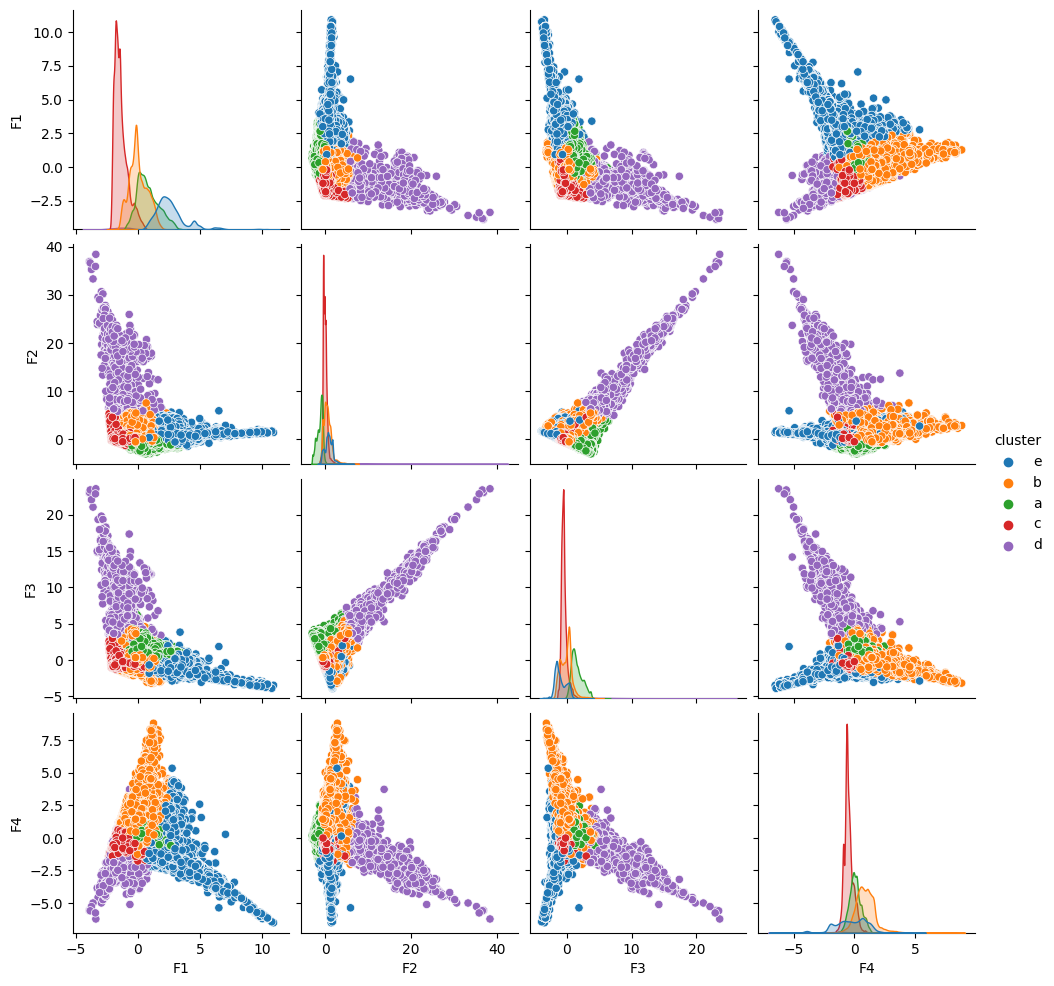

In [51]:
sns.pairplot(x_proj, hue="cluster")

In [58]:
x_proj

,F1,F2,F3,F4,cluster
0,3.523959,0.005789,-0.915282,-1.013455,e
1,3.324910,-0.761949,0.413186,-0.818422,e
2,0.293131,-0.366899,0.308253,0.689522,b
3,0.706794,-0.763552,1.049081,0.605235,a
4,0.706794,-0.763552,1.049081,0.605235,a
...,...,...,...,...,...
231010,-0.218157,0.339617,-0.565398,-0.426723,c
231011,-1.208546,-0.513468,-0.213874,-0.010060,c
231012,-0.151896,-0.672674,0.339025,1.454887,b
231013,-0.151578,5.442504,3.640708,0.456636,b


<AxesSubplot: >

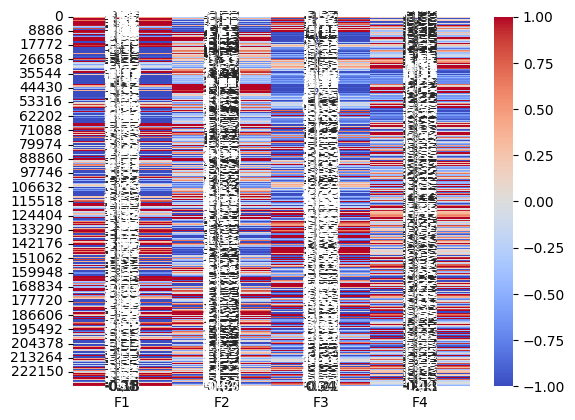

In [62]:
sns.heatmap(x_proj.drop(labels='cluster',axis = 1), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")